
# 🤖 Logistic Regression in Machine Learning


In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Step 1: Load your CSV data
data = pd.read_csv('heart.csv')

# Step 2: Separate features (X) and target (y)
X = data.drop(columns='target')  # Make sure 'target' exists
y = data['target']

# Optional: Check target class distribution
print("Target class distribution:")
print(y.value_counts())

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Step 4: Train the logistic regression model
model = LogisticRegression() 
model.fit(X_train, y_train)

# Step 5: Model Accuracy
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"\nTraining Accuracy: {train_score:.4f}")
print(f"Test Accuracy: {test_score:.4f}")

# Step 6: Optional - Make predictions
y_pred = model.predict(X_test)
print("\nFirst 10 predictions:", y_pred[:10])


Target class distribution:
target
1    165
0    138
Name: count, dtype: int64

Training Accuracy: 0.8679
Test Accuracy: 0.8132

First 10 predictions: [0 1 1 0 1 1 1 0 0 0]


c:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 🤔  Confusion Matrix?

A **confusion matrix** is a table used to evaluate the performance of a **classification model**, especially in binary and multiclass problems. It compares the **actual labels** with the **predicted labels** and helps identify where the model is making mistakes.

---

### 🔢 Structure of a Confusion Matrix (Binary Classification)

|                         | **Predicted Positive (1)** | **Predicted Negative (0)** |
| ----------------------- | -------------------------- | -------------------------- |
| **Actual Positive (1)** | True Positive (TP)         | False Negative (FN)        |
| **Actual Negative (0)** | False Positive (FP)        | True Negative (TN)         |

---

### 📘 Terms Explained:

* **True Positive (TP)**: Model predicted **positive**, and it **was** positive.
* **False Positive (FP)**: Model predicted **positive**, but it **was not** (Type I error).
* **False Negative (FN)**: Model predicted **negative**, but it **was actually positive** (Type II error).
* **True Negative (TN)**: Model predicted **negative**, and it **was** negative.

---

### 📈 Why Is It Useful?

From the confusion matrix, you can derive key metrics:

| Metric      | Formula                                           |
| ----------- | ------------------------------------------------- |
| Accuracy    | (TP + TN) / (TP + TN + FP + FN)                   |
| Precision   | TP / (TP + FP)                                    |
| Recall      | TP / (TP + FN)                                    |
| F1 Score    | 2 \* (Precision \* Recall) / (Precision + Recall) |
| Specificity | TN / (TN + FP)                                    |

---




Confusion Matrix:
[[32  9]
 [ 8 42]]


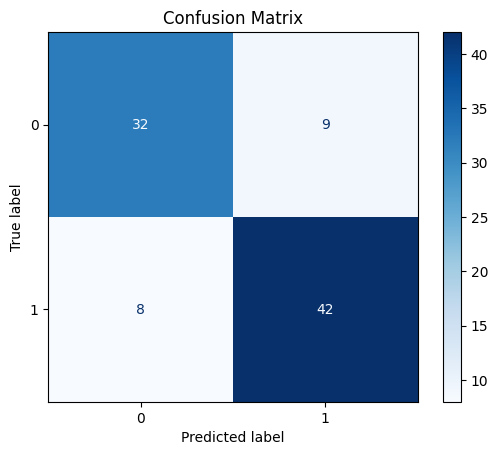

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

print("\nConfusion Matrix:")
print(cm)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# **Performance metrics** 
Performance metrics used in evaluating classification models, especially binary classification (like predicting heart disease: `0` = no, `1` = yes).

---

### 🎯 1. **Accuracy**

**Definition:** How often is the model correct?

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

* **Good when:** Classes are balanced.
* **Bad when:** One class dominates (imbalanced data).

---

### 🎯 2. **Precision**

**Definition:** Of all predicted positives, how many are truly positive?

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

* **High precision** = few false positives.
* **Useful for:** When false positives are costly (e.g., spam detection).

---

### 🎯 3. **Recall (Sensitivity, True Positive Rate)**

**Definition:** Of all actual positives, how many did the model correctly identify?

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

* **High recall** = few false negatives.
* **Useful for:** When missing a positive case is risky (e.g., disease detection).

---

### 🎯 4. **F1 Score**

**Definition:** Harmonic mean of precision and recall.

$$
\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

* **Balances precision and recall.**
* **Useful for:** Imbalanced datasets.

---

### 🎯 5. **ROC-AUC (Receiver Operating Characteristic - Area Under Curve)**

* **ROC Curve:** Plots **True Positive Rate** vs. **False Positive Rate**.
* **AUC Score (0–1):** Higher is better.

  * 0.5 = random guessing
  * 1.0 = perfect classification

---

### 🎯 6. **Specificity (True Negative Rate)**

$$
\text{Specificity} = \frac{TN}{TN + FP}
$$

* Focuses on correctly predicting negatives.
* Complements recall.

---

### 🔄 Quick Summary Table:

| Metric      | Focuses on                          | Good For When...            |
| ----------- | ----------------------------------- | --------------------------- |
| Accuracy    | Overall correctness                 | Classes are balanced        |
| Precision   | Avoiding false positives            | FP are costly               |
| Recall      | Avoiding false negatives            | FN are risky                |
| F1 Score    | Balance between precision & recall  | Data is imbalanced          |
| ROC-AUC     | Model's ability to rank predictions | Comparing models            |
| Specificity | Correct negatives                   | You care about false alarms |

---


In [ ]:
# Step 6: Evaluate performance
from sklearn.metrics import f1_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", round(acc, 4))
print("Precision:", round(prec, 4))
print("Recall:", round(rec, 4))
print("F1 Score:", round(f1, 4))

Accuracy: 0.8132
Precision: 0.8235
Recall: 0.84
F1 Score: 0.8317


In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

